# Synthetic import data

- Written by Yeon Soo Choi, Technical Officer, Research Unit, World Customs Organization
- Updated on 30 June 2020

## Summary 

This synthetic import was generated from real import data of multiple countries.  
The data has **200,000 import transactions** and **13 variables**;
- **Categorical variables (8)**: 'year', 'month', 'day', 'OFFICE (customs office of clearance)', 'IMPORTER.TIN (importer identification number)','TARIFF.CODE', 'ORIGIN.CODE', 'illicit (binary variable of illicitness'
- **Numeric variables (5)**: 'CIF_USD_EQUIVALENT', 'QUANTITY','GROSS.WEIGHT', 'TOTAL.TAXES.USD', 'RAISED_TAX_AMOUNT_USD (after Customs intervention)'

## Overview of synthetic import data

In [1]:
# Set environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', 100)

In [3]:
# Load data
df = pd.read_csv('./synthetic_data2.csv')

In [4]:
# Check columns
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'OFFICE', 'IMPORTER.TIN',
       'TARIFF.CODE', 'ORIGIN.CODE', 'CIF_USD_EQUIVALENT', 'QUANTITY',
       'GROSS.WEIGHT', 'TOTAL.TAXES.USD', 'RAISED_TAX_AMOUNT_USD', 'illicit'],
      dtype='object')

In [5]:
# Remove unnecessary column(s)
del df['Unnamed: 0']

In [6]:
# Preview of 50 sample lines of data
df.sample(10)

,year,month,day,OFFICE,IMPORTER.TIN,TARIFF.CODE,ORIGIN.CODE,CIF_USD_EQUIVALENT,QUANTITY,GROSS.WEIGHT,TOTAL.TAXES.USD,RAISED_TAX_AMOUNT_USD,illicit
53475,2013,6,13,OFFICE141,IMPO17643,4911109091,CNTRY139,268396.0,80.0,1.0,111.0,50.0,1
174399,2014,9,12,OFFICE59,IMP975819,8702101319,CNTRY376,234837.0,3132.0,416129.0,748.0,-0.0,0
51146,2013,6,4,OFFICE40,IMP358732,8711109000,CNTRY264,7134.0,1104.0,114471.0,721.0,808.0,1
122304,2014,2,8,OFFICE40,IMP492441,3902300000,CNTRY759,2386.0,1403.0,23386.0,3698.0,0.0,0
7567,2013,1,24,OFFICE51,IMP727169,8702101319,CNTRY263,2979115.0,1.0,13263.0,524.0,-0.0,0
36099,2013,4,18,OFFICE60,IMP243951,8704322000,CNTRY680,8672.0,25.0,490411.0,1199.0,-0.0,0
138328,2014,4,11,OFFICE237,IMPO19420,8421392000,CNTRY825,142148.0,1178.0,1079.0,5.0,-0.0,0
176644,2014,9,25,OFFICE297,IMPO14585,4002110000,CNTRY334,70.0,15.0,14254.0,7001.0,-0.0,0
14263,2013,2,12,OFFICE60,IMP826164,8704322000,CNTRY615,109438.0,1.0,29846.0,3552.0,-0.0,0
71952,2013,8,22,OFFICE51,IMP963208,8703332100,CNTRY680,104661.0,2067.0,182123.0,394.0,-0.0,0


In [7]:
df.dtypes

year                       int64
month                      int64
day                        int64
OFFICE                    object
IMPORTER.TIN              object
TARIFF.CODE                int64
ORIGIN.CODE               object
CIF_USD_EQUIVALENT       float64
QUANTITY                 float64
GROSS.WEIGHT             float64
TOTAL.TAXES.USD          float64
RAISED_TAX_AMOUNT_USD    float64
illicit                    int64
dtype: object

D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\javia\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

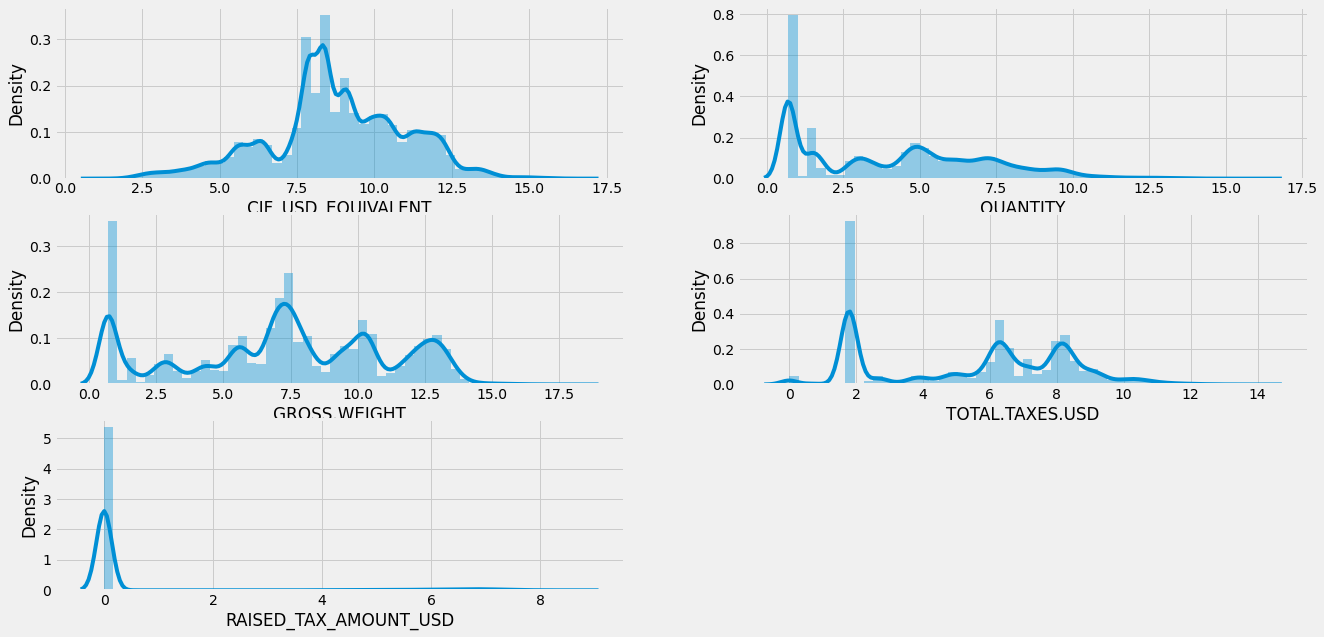

In [26]:
# Visualize the distribution of numeric variables

# Define numeric variables
#numeric_vars = ['CIF_USD_EQUIVALENT','TOTAL.TAXES.USD','QUANTITY','RAISED_TAX_AMOUNT_USD','GROSS.WEIGHT']
numeric_vars = [x for x in df.columns if df[x].dtype == 'float64']

# Set figure size
plt.figure(figsize=(20,10))

for i, var in enumerate(numeric_vars):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[var].apply(np.log1p), kde=True)

In [11]:
# Count classes of categorical variables
categorical_vars = list(set(df.columns)-set(numeric_vars))

for var in categorical_vars:
    print(var,'n_classes', df[var].nunique())

IMPORTER.TIN n_classes 15348
day n_classes 31
ORIGIN.CODE n_classes 130
illicit n_classes 2
TARIFF.CODE n_classes 6333
month n_classes 12
OFFICE n_classes 73
year n_classes 2


In [17]:
numeric_vars

['CIF_USD_EQUIVALENT',
 'QUANTITY',
 'GROSS.WEIGHT',
 'TOTAL.TAXES.USD',
 'RAISED_TAX_AMOUNT_USD']

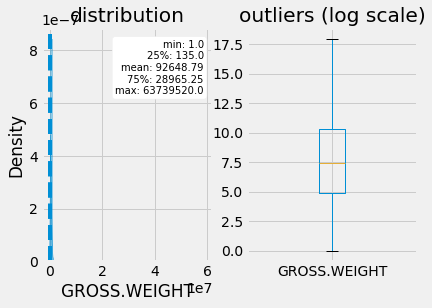

<Figure size 1008x864 with 0 Axes>

In [22]:
def plot_dist_box(variable):
    df = pd.read_csv('./synthetic_data2.csv')
    del df['Unnamed: 0']
    
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        dtf = df
        x = variable
        fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
        #fig.suptitle(x, fontsize=20)
        ### distribution
        ax[0].title.set_text('distribution')
        variable = dtf[x].fillna(dtf[x].mean())
        breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
        variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]
        sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
        des = dtf[x].describe()
        ax[0].axvline(des["25%"], ls='--')
        ax[0].axvline(des["mean"], ls='--')
        ax[0].axvline(des["75%"], ls='--')
        ax[0].grid(True)
        des = round(des, 2).apply(lambda x: str(x))
        box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
        ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
        ### boxplot 
        ax[1].title.set_text('outliers (log scale)')
        tmp_dtf = pd.DataFrame(dtf[x])
        tmp_dtf[x] = np.log(tmp_dtf[x])
        tmp_dtf.boxplot(column=x, ax=ax[1])
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=[14, 12])
        plt.show()

plot_dist_box(numeric_vars[2])